# Spam Classifier

Building a spam classifier model using Tf-IDF Vectorizer and Naive Bayes Model

Importing the required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from wordcloud import WordCloud

In [7]:
from PIL import Image  # used for saving many different image file formats.

In [26]:
import os

## Loading the dataset

In [9]:
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\spam.csv",encoding='ISO-8859-1')

In [10]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


 We’ll rename the v1 and v2 columns to class_label and message respectively while getting rid of the rest of the columns.

In [11]:
data.rename(columns = {'v1':'class_label','v2':'message'},inplace = True)
data.drop(["Unnamed: 2",'Unnamed: 3','Unnamed: 4'],axis = 1,inplace = True)

In [12]:
data.head()

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploring the dataset - Bar Chart
 We’ll look at how many spam/ham messages we have and create a bar chart for it.

In [13]:
data['class_label'].value_counts()

ham     4825
spam     747
Name: class_label, dtype: int64

Our dataset has 4825 ham messages and 747 spam messages. This is an imbalanced dataset; the number of ham messages is much higher than those of spam! This can potentially cause our model to be biased. To fix this, we could resample our data to get an equal number of spam/ham messages.

In [14]:
labels = ['ham', 'spam']
counts = [4825, 747]
ypos = np.arange(len(labels)) #converting text labels to numberic value, 0 and 1
ypos

array([0, 1])

<BarContainer object of 2 artists>

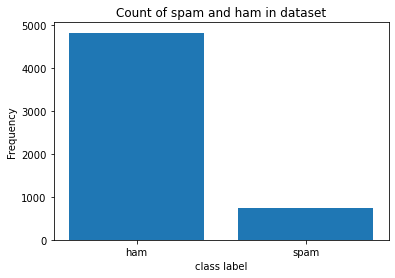

In [17]:
plt.xticks(ypos, labels)
plt.xlabel("class label")
plt.ylabel("Frequency")
plt.title("Count of spam and ham in dataset")
plt.bar(ypos, counts)

# WordCloud
First, we’ll filter out all the spam messages from our dataset. df_spam is a DataFrame that contains only spam messages and df_ham is a DataFrame that contains only ham messages

In [18]:
df_spam = data[data.class_label=='spam']

In [19]:
df_spam

,class_label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [21]:
df_ham = data[data.class_label=='ham']
df_ham

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Next, we’ll convert our DataFrame to a list, where every element of that list will be a spam message. Then, we’ll join each element of our list into one big string of spam messages. The lowercase form of that string is the required format needed for our word cloud creation.

In [22]:
#convert to list

ham_list=df_ham['message'].tolist()
spam_list= df_spam['message'].tolist()

In [24]:

filtered_spam = ("").join(spam_list) #convert the list into a string of spam
filtered_spam = filtered_spam.lower()

filtered_ham = ("").join(ham_list) #convert the list into a string of ham
filtered_ham = filtered_ham.lower()

## Spam words

In [29]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_spam)

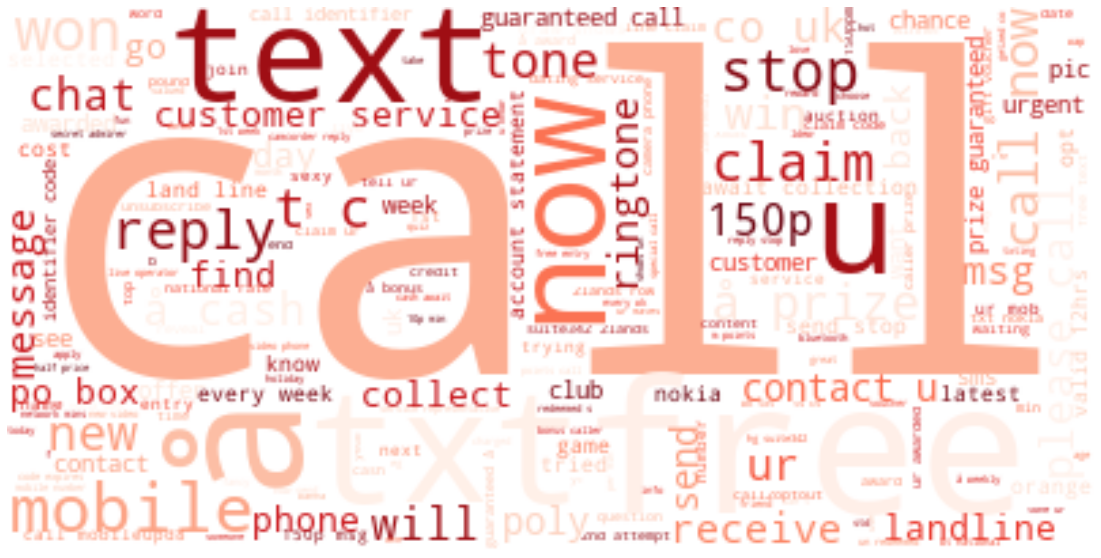

In [30]:
# Display the generated image

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.margins(x=0, y=0)

plt.show()

## Ham words

In [33]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_ham)

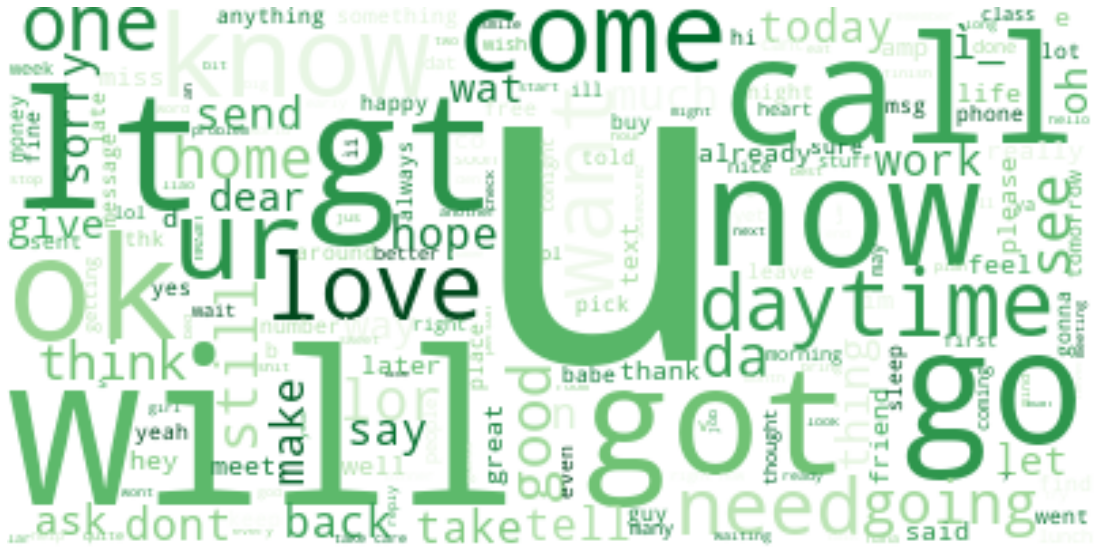

In [34]:
# Display the generated image

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.margins(x=0, y=0)

plt.show()

# Split the dataset
 convert our class labels from string to numeric form

In [35]:
data['class_label'] = data['class_label'].apply(lambda x: 1 if x == 'spam' else 0)

Importing relevant module from sklearn library

In [36]:
from sklearn.model_selection import train_test_split

Making the split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['class_label'], test_size = 0.3, random_state = 0)

Let’s now see how many messages we have for our test and train subsets:

In [39]:
print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))

rows in test set: (1672,)
rows in train set: (3900,)


#  Apply Tf-IDF Vectorizer for feature extraction
TF-IDF Vectorizer creates Tf-IDF values for every word in our text messages. Tf-IDF values are computed in a manner that gives a higher value to words appearing less frequently so that words appearing many times due to English syntax don’t overshadow the less frequent yet more meaningful and interesting terms.

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorize email text into tfidf matrix
# TfidfVectorizer converts collection of raw documents to a matrix of TF-IDF features.
# It's equivalent to CountVectorizer followed by TfidfTransformer.
list = x_train.tolist()
vectorizer = TfidfVectorizer(
    input= list ,  # input is actual text
    lowercase=True,      # convert to lower case before tokenizing
    stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(list) #gives tf idf vector
features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vector


# Train our Naive Bayes Model
We fit our Naïve Bayes model, aka MultinomialNB, to our Tf-IDF vector version of x_train, and the true output labels stored in y_train.

In [41]:
from sklearn.naive_bayes import MultinomialNB

# train a classifier
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)

MultinomialNB()

# Check out the accuracy, and f-measure

In [42]:

# review the classifier accuracy
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

classifier accuracy 96.41%


# View the confusion matrix and classification report

In [43]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
actual = y_test.tolist() 
predicted = labels 
results = confusion_matrix(actual, predicted) 
  
print('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted) )

score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1434    0]
 [  60  178]]
Accuracy Score : 0.9641148325358851
Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1434
           1       1.00      0.75      0.86       238

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.96      0.96      1672

F-Measure: 0.856


# Heatmap for our Confusion Matrix

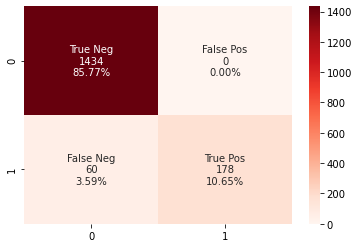

In [44]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Reds')